In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd

In [4]:
! pip install openpyxl

In [5]:
df_1= pd.read_excel("C:\\Users\\Dell\\Desktop\\online_retail_II.xlsx",sheet_name= 'Year 2009-2010')
df_2= pd.read_excel("C:\\Users\\Dell\\Desktop\\online_retail_II.xlsx",sheet_name= 'Year 2010-2011')

In [6]:
df= pd.concat([df_1,df_2],ignore_index=True)

In [7]:
print(df.shape)

(1067371, 8)


In [8]:
print(df.columns)

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


In [10]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,1.067371e+06,1067371,1.067371e+06,824364.000000
mean,9.938898e+00,2011-01-02 21:13:55.394028544,4.649388e+00,15324.638504
min,-8.099500e+04,2009-12-01 07:45:00,-5.359436e+04,12346.000000
25%,1.000000e+00,2010-07-09 09:46:00,1.250000e+00,13975.000000
50%,3.000000e+00,2010-12-07 15:28:00,2.100000e+00,15255.000000
75%,1.000000e+01,2011-07-22 10:23:00,4.150000e+00,16797.000000
max,8.099500e+04,2011-12-09 12:50:00,3.897000e+04,18287.000000
std,1.727058e+02,NaN,1.235531e+02,1697.464450


# Data Cleaning

In [11]:
df=df.dropna(subset=["InvoiceDate", "Customer ID"])
# To remove Null values

In [12]:
print(df.shape)

(824364, 8)


In [13]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [14]:
df= df[~df["Invoice"].astype(str).str.startswith("C")]

In [15]:
df.shape

(805620, 8)

In [16]:
df= df[df["Quantity"]>0]
df= df[df["Price"]>0]
# Removing negative values

In [17]:
df.shape 
805620-805549
#Total 71 Rows have negative values

71

# Feature engineering
### Adding New Features

In [18]:
df["Revenue"]= df["Price"]* df["Quantity"]
df["InvoiceDate"]= pd.to_datetime(df["InvoiceDate"])
df["Month"]= df["InvoiceDate"].dt.to_period("M").astype(str)

In [20]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,Month
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,2009-12
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,2009-12
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,2009-12


In [38]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline

In [40]:
monthly_revenue= df.groupby("Month")["Revenue"].sum().sort_index()

In [41]:
monthly_revenue

Month
2009-12     686654.160
2010-01     557319.062
2010-02     506371.066
2010-03     699608.991
2010-04     594609.192
2010-05     599985.790
2010-06     639066.580
2010-07     591636.740
2010-08     604242.650
2010-09     831615.001
2010-10    1036680.000
2010-11    1172336.042
2010-12     884591.890
2011-01     569445.040
2011-02     447137.350
2011-03     595500.760
2011-04     469200.361
2011-05     678594.560
2011-06     661213.690
2011-07     600091.011
2011-08     645343.900
2011-09     952838.382
2011-10    1039318.790
2011-11    1161817.380
2011-12     518210.790
Name: Revenue, dtype: float64

In [42]:
monthly_revenue.head()

Month
2009-12    686654.160
2010-01    557319.062
2010-02    506371.066
2010-03    699608.991
2010-04    594609.192
Name: Revenue, dtype: float64

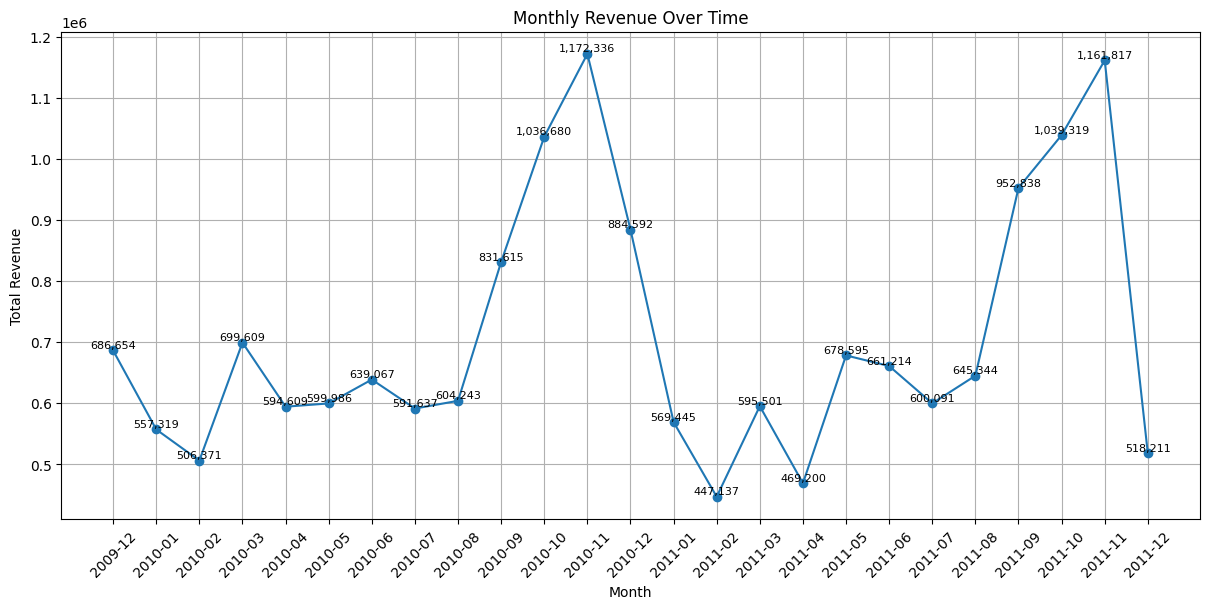

In [54]:
font={'family': 'serif',
      'color':  'darkred',
      'weight': 'normal',
      'size': 12,
    }



plt.figure(figsize=(12,6))
plt.plot(monthly_revenue.index, monthly_revenue.values, marker='o')
plt.xticks(rotation=45)
plt.title("Monthly Revenue Over Time")

for i, value in enumerate(monthly_revenue.values):
    plt.text(i, value, f'{value:,.0f}', ha='center', va='bottom', fontsize=8)   
plt.tight_layout()
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.grid()
plt.show()

In [29]:
monthly_revenue.index

Index(['2009-12', '2010-01', '2010-02', '2010-03', '2010-04', '2010-05',
       '2010-06', '2010-07', '2010-08', '2010-09', '2010-10', '2010-11',
       '2010-12', '2011-01', '2011-02', '2011-03', '2011-04', '2011-05',
       '2011-06', '2011-07', '2011-08', '2011-09', '2011-10', '2011-11',
       '2011-12'],
      dtype='object', name='Month')

In [56]:
df.groupby("Month")["Revenue"].sum().sort_values(ascending=False).head()

Month
2010-11    1172336.042
2011-11    1161817.380
2011-10    1039318.790
2010-10    1036680.000
2011-09     952838.382
Name: Revenue, dtype: float64

In [58]:
country_revenue

Country
United Kingdom    1.472315e+07
EIRE              6.216311e+05
Netherlands       5.542323e+05
Germany           4.312625e+05
France            3.552575e+05
Australia         1.699681e+05
Spain             1.091785e+05
Switzerland       1.003653e+05
Sweden            9.154972e+04
Denmark           6.986219e+04
Name: Revenue, dtype: float64

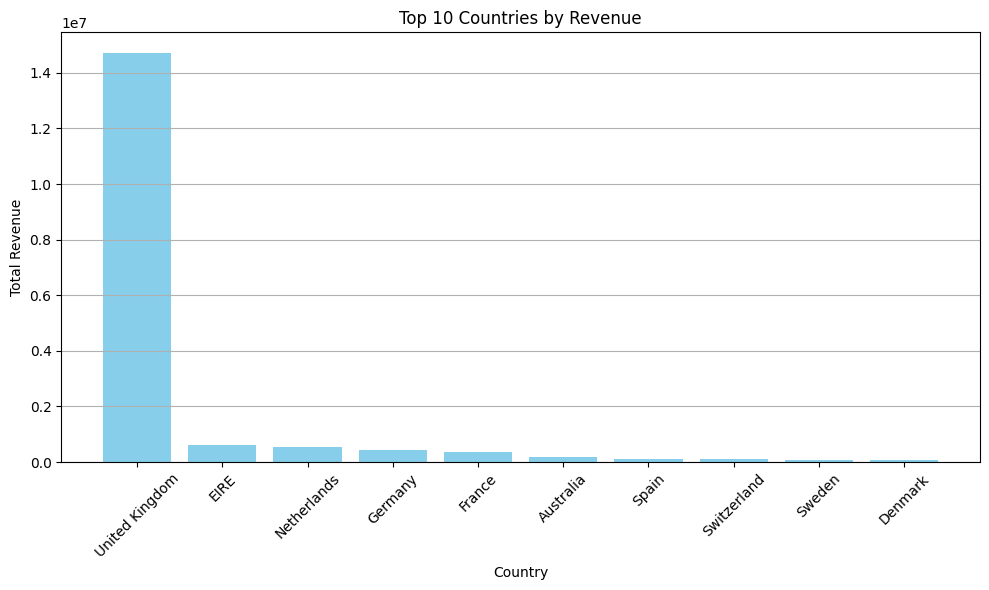

In [68]:
plt.figure(figsize=(10,6))
plt.bar(country_revenue.index, country_revenue.values, color='skyblue')

plt.title("Top 10 Countries by Revenue")
plt.xticks(rotation=45)
plt.xlabel("Country")
plt.ylabel("Total Revenue")
plt.tight_layout()
plt.grid(axis='y')

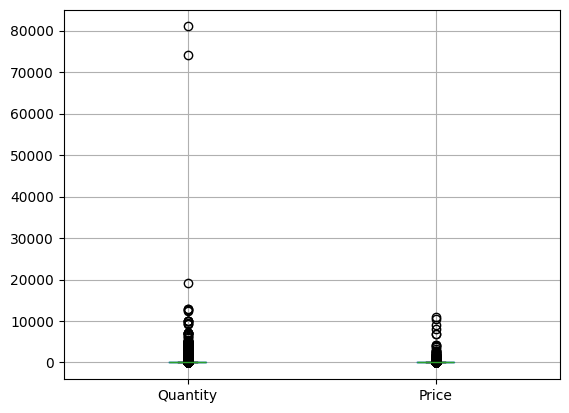

In [69]:
df[["Quantity", "Price"]].boxplot();